In [10]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )


In [4]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,),(5,5,),(10,10,),(15,15,),(20,20,)],
}

model = MLPClassifier(max_iter=10000, random_state=1)

grid_search = GridSearchCV(model, param_grid, cv=5,  scoring='accuracy')


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10000, random_state=1),
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (5, 5), (10, 10), (15, 15),
                                                (20, 20)]},
             scoring='accuracy')

In [5]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

columns_to_show = ['param_hidden_layer_sizes', 'mean_test_score']
results_table = results[columns_to_show]

print(results_table)

  param_hidden_layer_sizes  mean_test_score
0                     (5,)         0.865714
1                    (10,)         0.854286
2                    (15,)         0.845714
3                    (20,)         0.845714
4                   (5, 5)         0.854286
5                 (10, 10)         0.854286
6                 (15, 15)         0.857143
7                 (20, 20)         0.848571


Podemos observar que la mejor combinacion de hiperparametros se dio con 5 capas y con mayores capas no mostraron un mejor rendimiento

In [6]:
best_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=10000, random_state=1)

best_model.fit(X_train, y_train)

accuracy = best_model.score(X_test, y_test)
print("Precisión en datos de prueba:", accuracy)

Precisión en datos de prueba: 0.8866666666666667


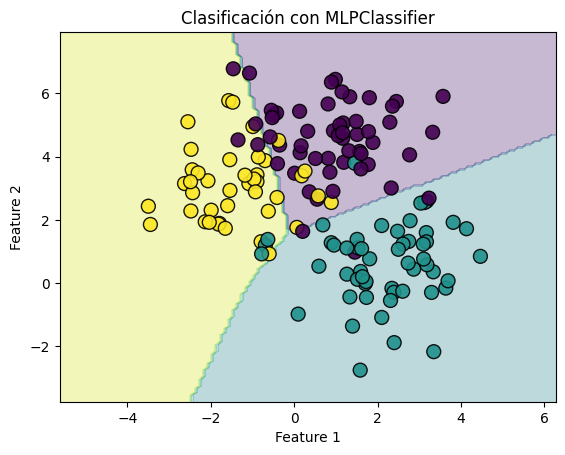

In [11]:
y_pred = grid_search.predict(X_test)

# Obtenemos los límites de la gráfica
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecimos las etiquetas para cada punto en la malla
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generamos el gráfico
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, alpha=0.9, edgecolors='k')
plt.title('Clasificación con MLPClassifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

las fronteras de decision no son perfectas
